In [49]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from random_forest_model import RandomForestModel
from feed_forward_nn import FeedForwardNN
from cnn_model import CNNModel
import time
from rich import print
import pandas as pd
from mnist_classifier import MnistClassifier




In [15]:
# Завантажую дані
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
# Порвняю дані тесту і цільового занячення втесті
print(X_train[0], y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

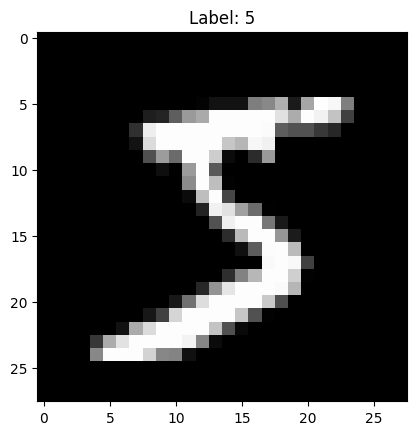

In [17]:
# Візуалізую 
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [18]:
# Згідно з розмірності матриці і даних в ній, значення варіюється від 0 до 250. Для начання модеоі це занадто великий мастштаб. Найраще зробити діпазон від 0 до 1X_
X_train = X_train/255
X_test = X_test/255

print(X_train[0], y_train[0])
print(f'X_train_MIN:', X_train.min(), 'X_train_MAX:',X_train.max())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# Протестую ліс.
# створив модель
rf_model = RandomForestModel(n_estimators=100, random_state=42)
start_time = time.time()
# Навчання моделі
rf_model.train(X_train, y_train)

# Тестую модель, отримаю передбачення
y_pred = rf_model.predict(X_test)
end_time = time.time()
training_time_rf = end_time - start_time
acc_score_rf = accuracy_score(y_test, y_pred)
print(f"Prognozovana tochnist: {acc_score_rf:.1%}")
print(f"Час навчання Random Forest: {training_time_rf:.2f} секунд")



Prognozovana tochnist: 96.9%

Час навчання Random Forest: 21.78 секунд

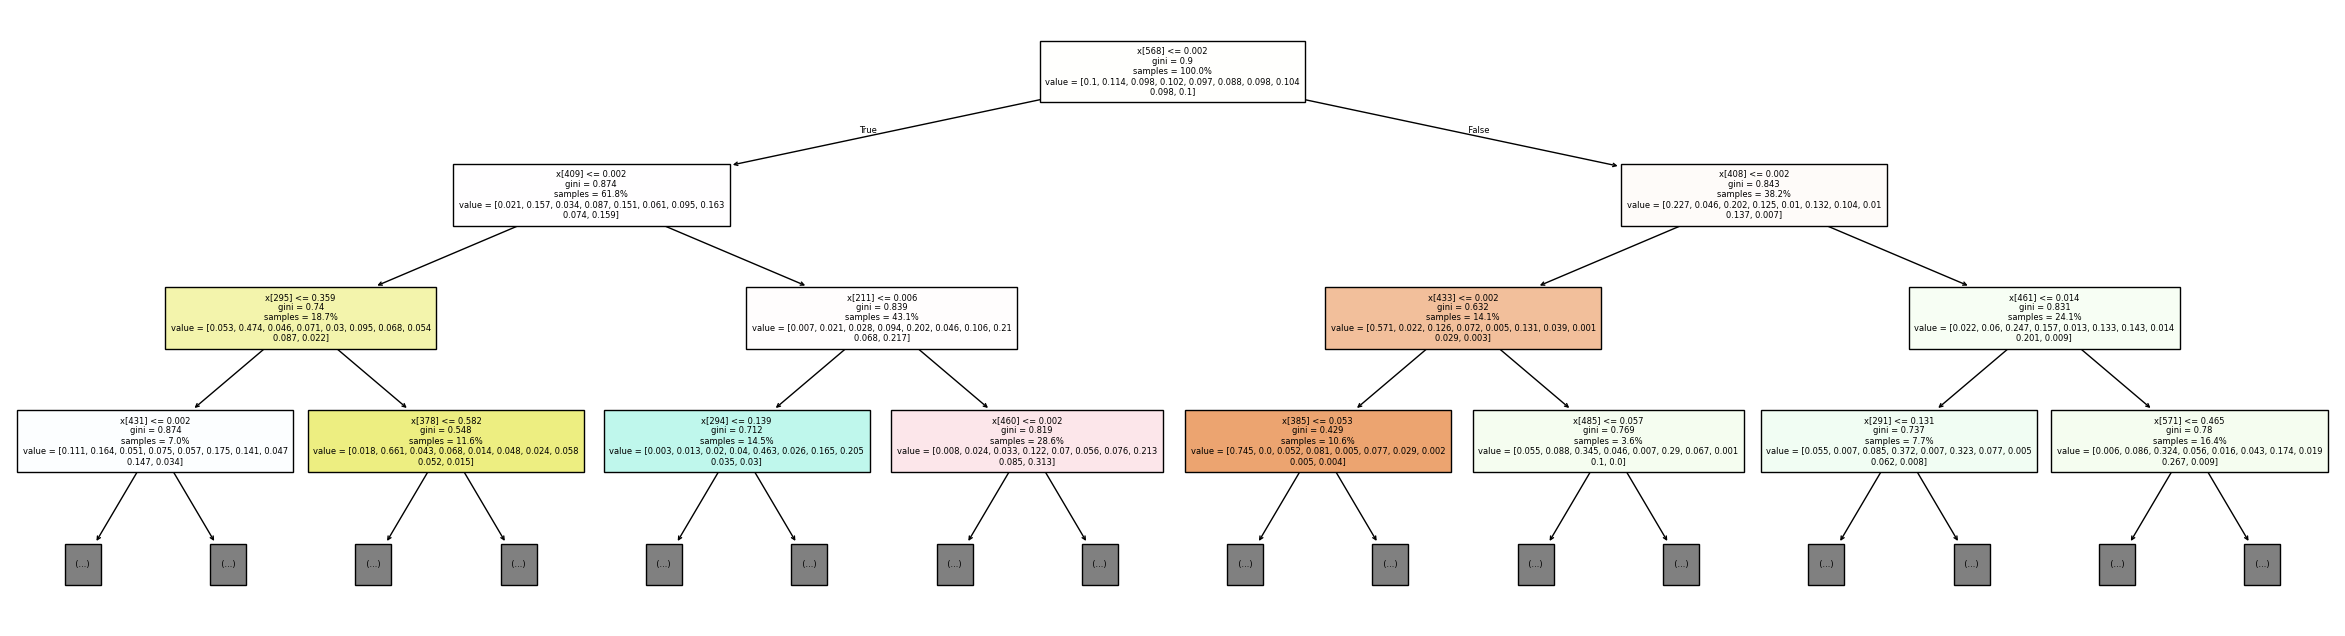

In [20]:
# Спробую намалювати це дерево
one_tree = rf_model.model.estimators_[0]

plt.figure(figsize=(30, 8))
tree.plot_tree(one_tree, filled=True, max_depth=3, fontsize=6, proportion=True)

plt.show()

In [52]:
nn_model = FeedForwardNN()
start_time = time.time()
nn_model.train(X_train, y_train, epochs=10, batch_size=16)

y_pred_nn = nn_model.predict(X_test)
end_time = time.time()
training_time_nn = end_time - start_time
acc_score_nn = accuracy_score(y_test, y_pred_nn)
print(f"Точність Feed Forward NN: {acc_score_nn:.1%}")
print(f"Час навчання Feed Forward NN: {training_time_nn:.2f} секунд")

Epoch 1/10


/opt/anaconda3/envs/venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 676us/step - accuracy: 0.9349 - loss: 0.2169
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 674us/step - accuracy: 0.9700 - loss: 0.0964
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 691us/step - accuracy: 0.9790 - loss: 0.0679
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 688us/step - accuracy: 0.9831 - loss: 0.0530
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 684us/step - accuracy: 0.9861 - loss: 0.0427
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 704us/step - accuracy: 0.9887 - loss: 0.0351
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 666us/step - accuracy: 0.9906 - loss: 0.0294
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 671us/step - accuracy: 0.9911 - loss: 0.0287
Epoch 9/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - accuracy: 0.9924 - loss: 0.0227
Epoch 10/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 672us/step - accuracy: 0.9931 - loss: 0.0215
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


Точність Feed Forward NN: 98.0%

Час навчання Feed Forward NN: 26.17 секунд

In [34]:
cnn_model = CNNModel()
start_time = time.time()
cnn_model.train(X_train, y_train, epochs=5, batch_size=128)
y_pred_cnn = cnn_model.predict(X_test)
end_time = time.time()
training_time_cnn = end_time - start_time
acc_score_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Точність CNNModel: {acc_score_cnn:.1%}")
print(f"Час навчання CNNModel: {training_time_nn:.2f} секунд")

Epoch 1/5


/opt/anaconda3/envs/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9408 - loss: 0.2039
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9830 - loss: 0.0547
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9883 - loss: 0.0381
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9909 - loss: 0.0293
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9929 - loss: 0.0236
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Точність CNNModel: 98.8%

Час навчання CNNModel: 26.48 секунд

In [47]:
data = {'Model': ['Random Forest', 'Feed Forward NN', 'CNNModel'],
        'Accuracy': [f'{acc_score_rf:.1%}', f'{acc_score_nn:.1%}', f'{acc_score_cnn:.1%}'],
        'Time, sec': [f'{training_time_rf:.2f}', f'{training_time_nn:.2f}', f'{training_time_cnn:.2f}']
        }
df = pd.DataFrame(data)
df

,Model,Accuracy,"Time, sec"
0,Random Forest,96.9%,21.78
1,Feed Forward NN,97.9%,26.48
2,CNNModel,98.8%,36.19


In [54]:
clf = MnistClassifier("rf")  # або "rf", "nn" чи "cnn"
start_time = time.time()
clf.train(X_train, y_train)
y_pred = clf.predict(X_test)
end_time = time.time()
training_time_mnist_cl = end_time - start_time
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Час навчання: {training_time_mnist_cl:.2f} секунд")

Навчання моделі: RandomForestModel
Передбачення за моделлю: RandomForestModel


Accuracy: 0.9692

Час навчання: 21.98 секунд

Що можу сказати у висновках. Мені сподобалося працбвати над цим завданням. Длятакого завдання цілком достатньо використовувати RandomForest або Feed Forward NN "на мінімалках" щоб виграти час. Як я вже писав для мене Feed Forward NN, CNNModel це нові алгоритми і чесно кажучі не повністю в них розіюрався потрібна практика. Думаю, ці алгорими прихначені для більш цікавих задач. Над цими моделями ще модна гратися і вдосконалбвати але не на ьому прикладі, бо відразу отримав хороші результати.